# Chapter 3 - Stationary Time Series Models

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
import statsmodels.tsa.arima_process as ap
from PythonTsa.CheckStationarynInvertible import isstationary, isinvertible

#### Given an AR(2) model as follows
    Xt = 0.8Xt−1 − 1.3Xt−2 + εt
#### where εt ∼ iidN(0,1), first, simulate a sample of length 100 from the AR(2) model, and then graph its time series plot. Third, find the roots of its AR polynomial and determine whether it is stationary.

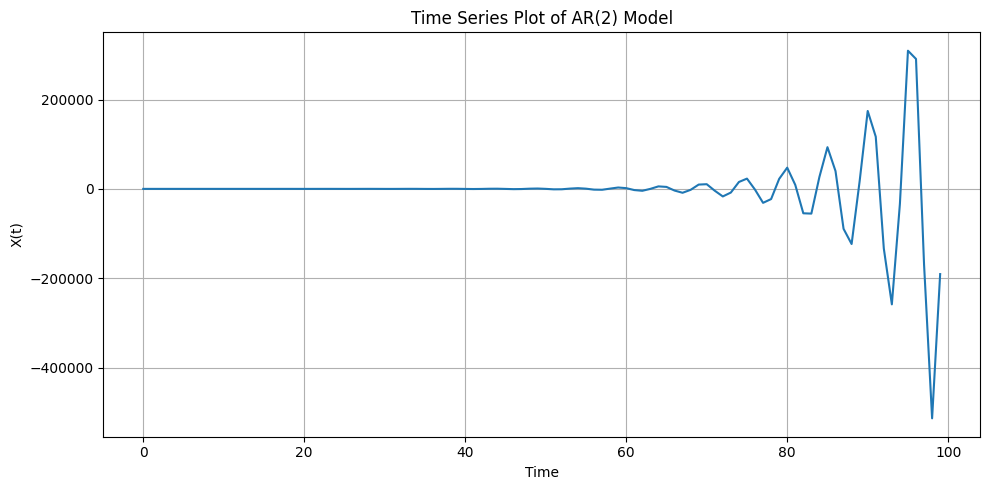

In [5]:
np.random.seed(42)                  # Random seed
n = 100                             # Length of the time series

epsilon = np.random.normal(0, 1, n) # Generate white noise (εt) from a normal distribution (mean: 0, variance: 1)

X = np.zeros(n)                     # Initialize an array to store X(t)

# Define the AR(2) model: X(t) = 0.8 * X(t-1) - 1.3 * X(t-2) + ε(t)
for t in range(2, n):
    X[t] = 0.8 * X[t-1] - 1.3 * X[t-2] + epsilon[t]

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(X, label='X(t) from AR(2) model')
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.title('Time Series Plot of AR(2) Model')
plt.grid(True)
plt.tight_layout()
plt.show()

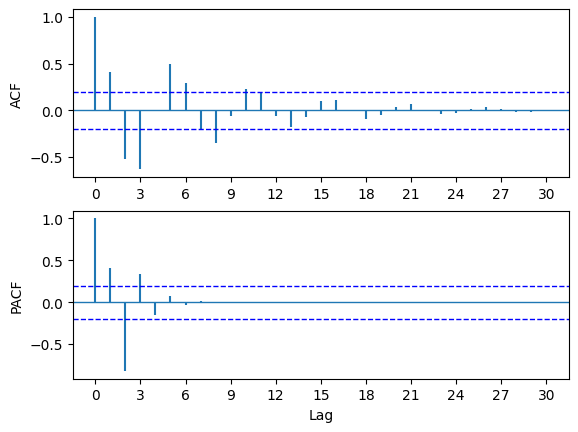

In [6]:
# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
acf_pacf_fig(X, both = True)

    ACF: A gradual decay of autocorrelations at higher lags (sinusoidal manner).

    PACF: Spikes at lags 1 & 2; decay after that.

In [8]:
#               AR(2) model: X(t) = 0.8 * X(t-1) - 1.3 * X(t-2) + ε(t)
# Characteristic Polynomial: phi(B) = 1- 0.8B + 1.3B^2
#       Roots of Polynomial:      0 = 1- 0.8B + 1.3B^2

ar_2 = np.array([1, 0.8, 1.3])
roots2 = np.roots(ar_2)
print("Roots of autoregressive polynomial:", roots2)

Roots of autoregressive polynomial: [-0.4+1.06770783j -0.4-1.06770783j]


In [9]:
# Complex roots
root1 = -0.4 + 1.06770783j
root2 = -0.4 - 1.06770783j

# Calculate the modulus (absolute value) of each root
modulus_root1 = abs(root1)
modulus_root2 = abs(root2)

# Print the results
print("Modulus of root 1:", modulus_root1)
print("Modulus of root 2:", modulus_root2)

Modulus of root 1: 1.1401754295911262
Modulus of root 2: 1.1401754295911262


    Since the modulus of both roots is greater than 1, the process is stationary. 
    This confirms that the AR(2) model is stationary, because the roots lie outside the unit circle in the complex plane.

#### 3.10 Determine which of the following models are causal and/or invertible:
#### (1) X1(t) = 1.8X(t−1) + 0.8X(t−2) + ε(t) + 0.2ε(t−1) − 0.6ε(t−2)

In [12]:
# Define the AR and MA coefficients
ar1 = np.array([1, 1.8, 0.8])   # AR(2) coefficients
ma1 = np.array([1, 0.2, -0.6])  # MA(2) coefficients

# Generate the sample time series using ARMA
x1 = arma_generate_sample(ar=ar1, ma =ma1, nsample=100)

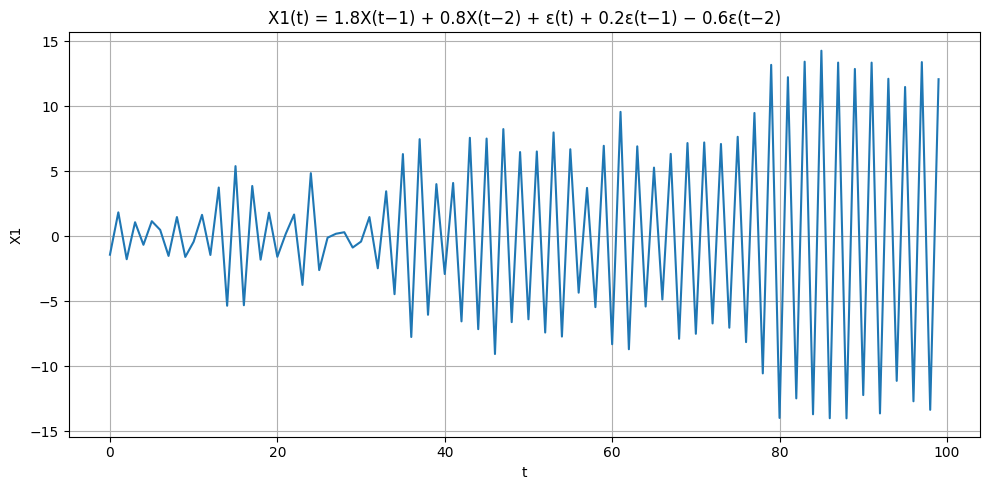

In [13]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(x1)
plt.xlabel('t')
plt.ylabel('X1')
plt.title('X1(t) = 1.8X(t−1) + 0.8X(t−2) + ε(t) + 0.2ε(t−1) − 0.6ε(t−2)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Function to check if AR polynomial is stationary
def is_stationary(ar_coeffs):
    
    roots = np.roots(ar_coeffs)       # Compute the roots of the AR polynomial    
    return np.all(np.abs(roots) > 1)  # Check if all roots lie outside the unit circle

# Function to check if MA polynomial is invertible
def is_invertible(ma_coeffs):
    
    roots = np.roots(ma_coeffs)       # Compute the roots of the MA polynomial
    return np.all(np.abs(roots) > 1)  # Check if all roots lie outside the unit circle

# Check stationarity and invertibility
print('Is Stationary?', is_stationary(ar1))  # Theorical approach
print('Is Invertible?', is_invertible(ma1))

Is Stationary? False
Is Invertible? False


#### (2) X2(t) = 0.8X(t−1) − 0.8X(t−2) + 0.4X(t−3) + ε(t) + 0.2ε(t−1) − 0.6ε(t−2) + 0.3ε(t−3)

In [16]:
# Define the AR and MA coefficients
ar2 = np.array([1, 0.8, -0.8, 0.4])   # AR(3) coefficients
ma2 = np.array([1, 0.2, -0.6, 0.3])   # MA(3) coefficients

# Generate the sample time series using ARMA
x2 = arma_generate_sample(ar=ar2, ma =ma2, nsample=100)

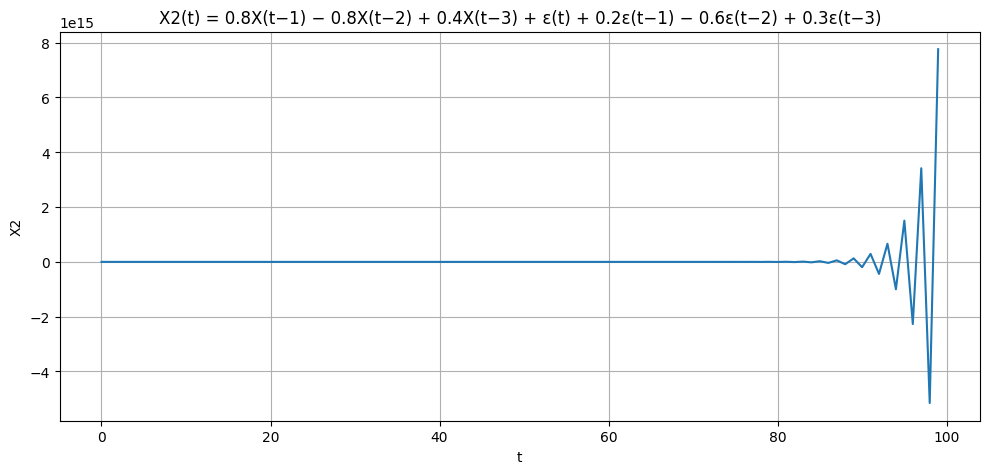

In [17]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(x2)
plt.xlabel('t')
plt.ylabel('X2')
plt.title('X2(t) = 0.8X(t−1) − 0.8X(t−2) + 0.4X(t−3) + ε(t) + 0.2ε(t−1) − 0.6ε(t−2) + 0.3ε(t−3)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Function to check if AR polynomial is stationary
def is_stationary(ar_coeffs):
    
    roots = np.roots(ar_coeffs)       # Compute the roots of the AR polynomial    
    return np.all(np.abs(roots) > 1)  # Check if all roots lie outside the unit circle

# Function to check if MA polynomial is invertible
def is_invertible(ma_coeffs):
    
    roots = np.roots(ma_coeffs)       # Compute the roots of the MA polynomial
    return np.all(np.abs(roots) > 1)  # Check if all roots lie outside the unit circle

# Check stationarity and invertibility
print('Is Stationary?', is_stationary(ar2))  # Theorical approach
print('Is Invertible?', is_invertible(ma2))

Is Stationary? False
Is Invertible? False


#### (3) X3(t) = 0.7X(t−1) − 0.8X(t−2) + 0.6X(t−3) + ε(t) − 0.2ε(t−1) − 0.6ε(t−2) + 0.3ε(t−3)

In [20]:
# Define the AR and MA coefficients
ar3 = np.array([1, 0.7, -0.8, 0.6])   # AR(3) coefficients
ma3 = np.array([1, -0.2, -0.6, 0.3])  # MA(3) coefficients

# Generate the sample time series using ARMA
x3 = arma_generate_sample(ar=ar3, ma =ma3, nsample=100)

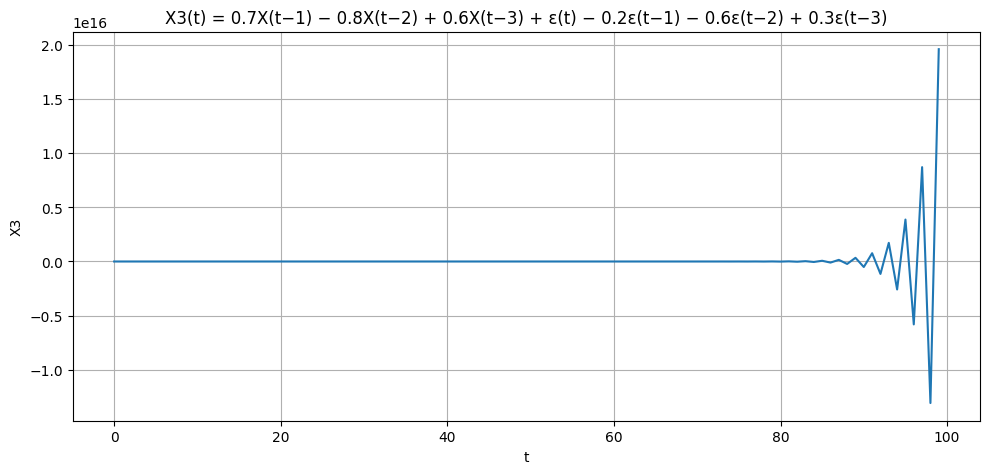

In [21]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(x3)
plt.xlabel('t')
plt.ylabel('X3')
plt.title('X3(t) = 0.7X(t−1) − 0.8X(t−2) + 0.6X(t−3) + ε(t) − 0.2ε(t−1) − 0.6ε(t−2) + 0.3ε(t−3)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Function to check if AR polynomial is stationary
def is_stationary(ar_coeffs):
    
    roots = np.roots(ar_coeffs)       # Compute the roots of the AR polynomial    
    return np.all(np.abs(roots) > 1)  # Check if all roots lie outside the unit circle

# Function to check if MA polynomial is invertible
def is_invertible(ma_coeffs):
    
    roots = np.roots(ma_coeffs)       # Compute the roots of the MA polynomial
    return np.all(np.abs(roots) > 1)  # Check if all roots lie outside the unit circle

# Check stationarity and invertibility
print('Is Stationary?', is_stationary(ar3))  # Theorical approach
print('Is Invertible?', is_invertible(ma3))

Is Stationary? False
Is Invertible? False


#### Given three ARMA models, graph their true ACF and PACF plots, respectively, and then observe the behaviors of the ACF and PACF.
#### (1) X4(t) = ε(t) + 0.2ε(t−1) − 0.6ε(t−2) − 0.3ε(t−3)

In [24]:
# Define the AR and MA coefficients
ar4 = np.array([1])                   # AR(0) coefficients
ma4 = np.array([1, 0.2, -0.6, -0.3])  # MA(3) coefficients

# Generate the sample time series using ARMA
x4 = arma_generate_sample(ar=ar4, ma =ma4, nsample=100)

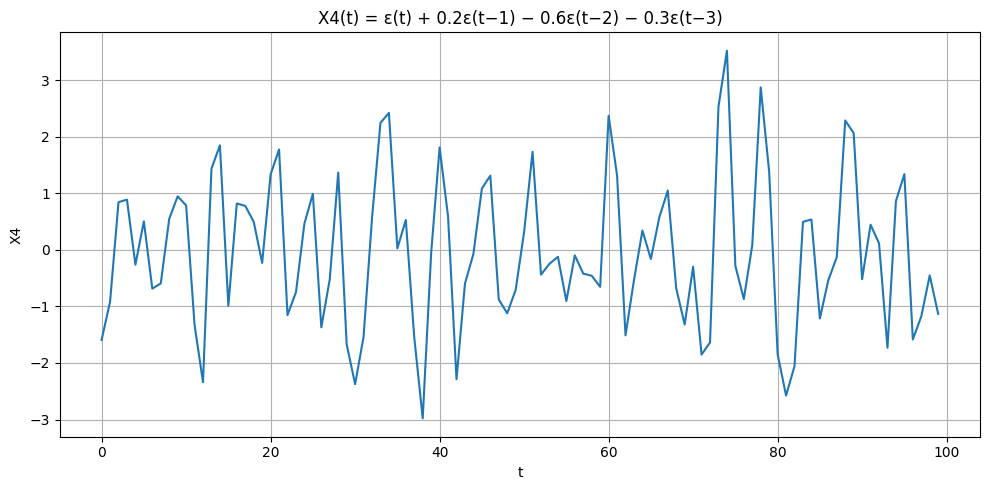

In [25]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(x4)
plt.xlabel('t')
plt.ylabel('X4')
plt.title('X4(t) = ε(t) + 0.2ε(t−1) − 0.6ε(t−2) − 0.3ε(t−3)')
plt.grid(True)
plt.tight_layout()
plt.show()

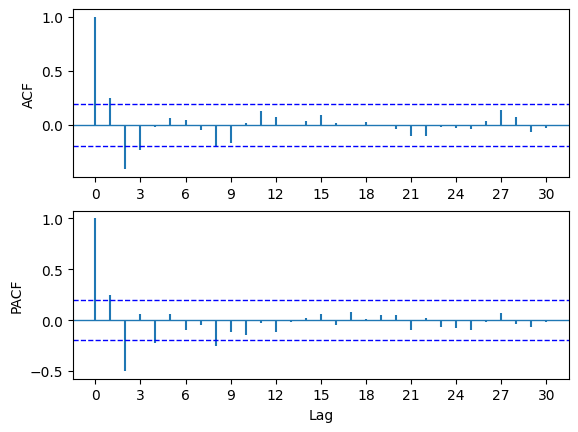

In [26]:
# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
acf_pacf_fig(x4, both = True)

#### (2) X5(t) = 0.7X(t−1) − 0.8X(t−2) + 0.6X(t−3) + ε(t)

In [28]:
# Define the AR and MA coefficients
ar5 = np.array([1, 0.7, -0.8, 0.6])  # AR(3) coefficients
ma5 = np.array([1])                  # MA(0) coefficients

# Generate the sample time series using ARMA
x5 = arma_generate_sample(ar=ar5, ma =ma5, nsample=100)

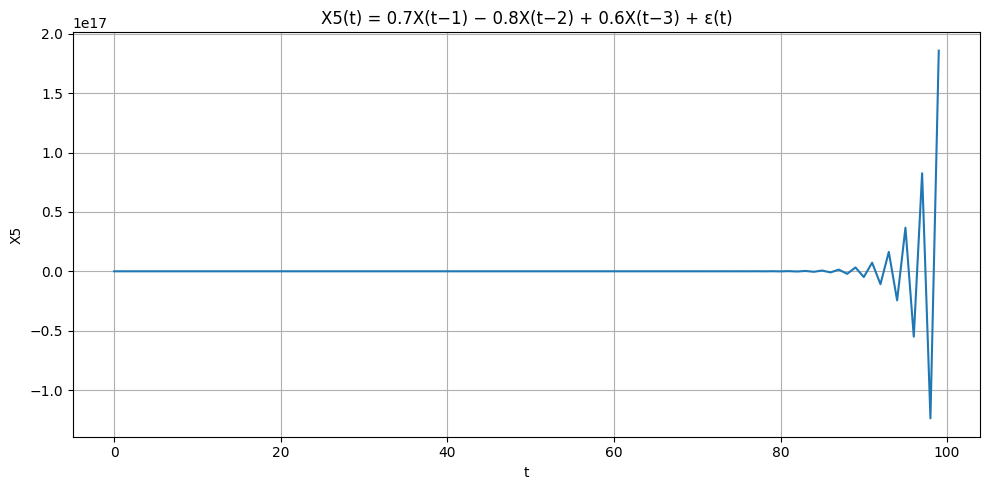

In [29]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(x5)
plt.xlabel('t')
plt.ylabel('X5')
plt.title('X5(t) = 0.7X(t−1) − 0.8X(t−2) + 0.6X(t−3) + ε(t)')
plt.grid(True)
plt.tight_layout()
plt.show()

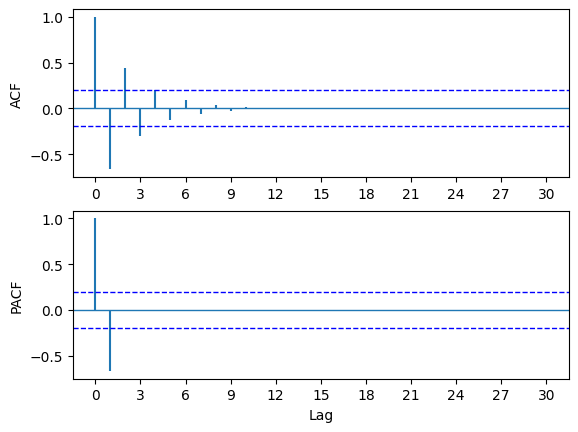

In [30]:
# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
acf_pacf_fig(x5, both = True)

#### (3) X6(t) = 0.7X(t−1) − 0.8X(t−2) + 0.6X(t−3) + ε(t) − 0.2ε(t−1) − 0.6ε(t−2) + 0.3ε(t−3)

In [32]:
# Define the AR and MA coefficients
ar6 = np.array([1, 0.7, -0.8, 0.6])   # AR(3) coefficients
ma6 = np.array([1, -0.2, -0.6, 0.3])  # MA(3) coefficients

# Generate the sample time series using ARMA
x6 = arma_generate_sample(ar=ar6, ma =ma6, nsample=100)

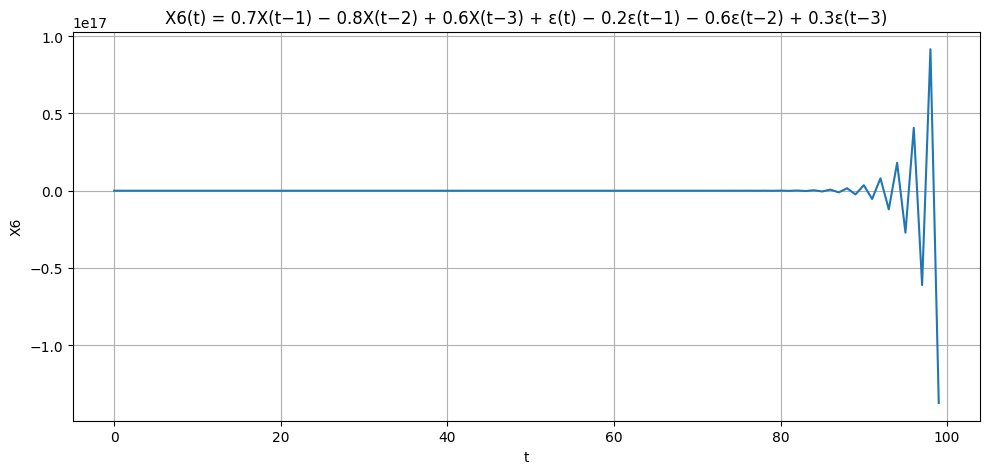

In [33]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(x6)
plt.xlabel('t')
plt.ylabel('X6')
plt.title('X6(t) = 0.7X(t−1) − 0.8X(t−2) + 0.6X(t−3) + ε(t) − 0.2ε(t−1) − 0.6ε(t−2) + 0.3ε(t−3)')
plt.grid(True)
plt.tight_layout()
plt.show()

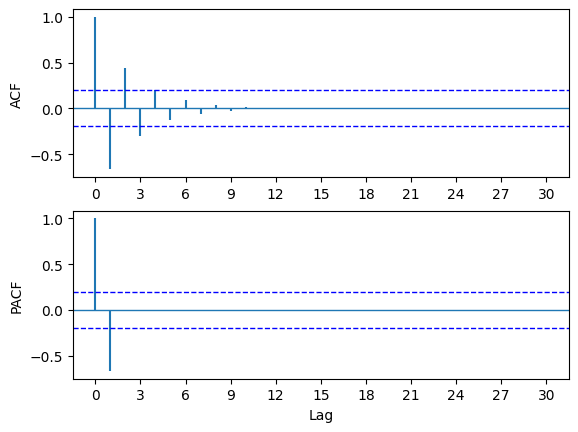

In [34]:
# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
acf_pacf_fig(x6, both = True)